Notes and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [113]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2

# Distributions

The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value. In this context, “frequency” means the number of times the value appears.



In [34]:
t = [1,2,2,3,5]

In [35]:
hist = {}
for i in t:
    hist[i] = hist.get(i,0)+1

In [36]:
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [37]:
hist.get(3)

1

In [38]:
# longer way with if statement
hist2={}
for i in t:
    if i in list(hist2.keys()):
        hist2[i] +=1
    else:
        hist2[i] = 1

In [27]:
hist2

{1: 1, 2: 2, 3: 1, 5: 1}

There is also another way from the collections module which is Counter class.

In [39]:
from collections import Counter
counter = Counter(t)
counter 

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [40]:
# the result is a counter object, not dictionary
type(counter)

collections.Counter

## Representing Histograms

In the thinkstats2 module there is a Hist function. The Hist constructor can take a sequence, dictionary, pandas Series, or another Hist. 

In [41]:
import thinkstats2
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [42]:
type(hist) # it's an object

thinkstats2.Hist

Given a list of values, there are several ways to count the frequency of each value.

In [43]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [44]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [45]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [46]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [47]:
hist.Freq(3)

1

You can also use the bracket operator, which does the same thing.

In [48]:
hist[3]

1

If the value does not appear, it has frequency 0.

In [49]:
hist[4]

0

The `Values` method returns the values:

In [51]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [52]:
for val in hist.Values():
    print(val, hist[val])

1 1
2 2
3 1
5 1


In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


## Plotting Histograms

Documentation of thinkplot is [here](http://greenteapress.com/thinkstats2/thinkplot.html)

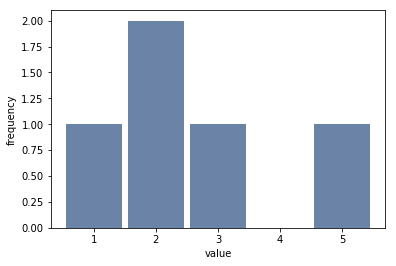

In [54]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [55]:
preg = nsfg.ReadFemPreg()

In [79]:
live = preg[preg.outcome ==1]

In [80]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

In [81]:
hist = thinkstats2.Hist(live.birthwgt_lb, label = 'birthwgt_lb') # creates a dictionary from the frequencies
hist

Hist({7.0: 3049, 6.0: 2223, 8.0: 1889, 5.0: 697, 9.0: 623, 4.0: 229, 10.0: 132, 3.0: 98, 2.0: 53, 1.0: 40, 11.0: 26, 12.0: 10, 0.0: 8, 13.0: 3, 14.0: 3, 15.0: 1}, 'birthwgt_lb')

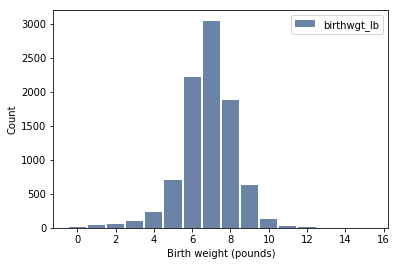

In [82]:
thinkplot.Hist(hist) # creates a histogram chart
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel = 'Count')

In [64]:
hist2 = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
hist2

Hist({0.0: 1037, 8.0: 756, 6.0: 709, 2.0: 603, 11.0: 557, 12.0: 555, 5.0: 535, 3.0: 533, 4.0: 525, 9.0: 505, 7.0: 501, 13.0: 487, 10.0: 475, 14.0: 475, 1.0: 408, 15.0: 378}, 'birthwgt_oz')

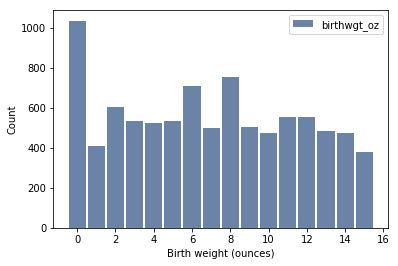

In [65]:
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Birth weight (ounces)', ylabel = 'Count')

In [69]:
hist3 = thinkstats2.Hist(np.floor(live.agepreg), label='mother_age')
hist3

Hist({21.0: 646, 20.0: 638, 23.0: 593, 24.0: 561, 19.0: 559, 22.0: 557, 18.0: 546, 26.0: 517, 25.0: 512, 27.0: 489, 28.0: 449, 17.0: 398, 30.0: 396, 29.0: 395, 31.0: 339, 32.0: 279, 16.0: 242, 33.0: 220, 34.0: 175, 35.0: 138, 15.0: 128, 36.0: 99, 37.0: 83, 38.0: 55, 14.0: 43, 39.0: 34, 40.0: 21, 13.0: 14, 41.0: 14, 10.0: 2, 42.0: 2, 12.0: 1, 44.0: 1, 11.0: 1, 43.0: 1}, 'mother_age')

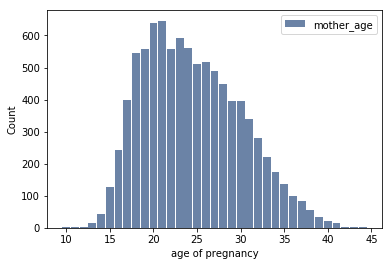

In [70]:
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='age of pregnancy', ylabel = 'Count')

In [84]:
hist4 = thinkstats2.Hist(live.prglngth, label='pregnance_length')
hist4

Hist({39: 4693, 40: 1116, 38: 607, 41: 587, 37: 455, 42: 328, 36: 321, 35: 311, 43: 148, 30: 138, 32: 115, 34: 60, 33: 49, 44: 46, 26: 35, 28: 32, 31: 27, 29: 21, 24: 13, 45: 10, 22: 7, 48: 7, 27: 3, 25: 3, 17: 2, 50: 2, 21: 2, 9: 1, 47: 1, 18: 1, 19: 1, 4: 1, 20: 1, 13: 1, 46: 1, 23: 1, 0: 1}, 'pregnance_length')

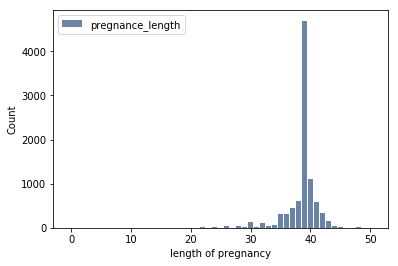

In [85]:
thinkplot.Hist(hist4)
thinkplot.Config(xlabel='length of pregnancy', ylabel = 'Count')

## Outliers

`Hist` provides smallest, which select the lowest values and their frequencies.

In [75]:
hist.Smallest(7)

[(0.0, 8),
 (1.0, 40),
 (2.0, 53),
 (3.0, 98),
 (4.0, 229),
 (5.0, 697),
 (6.0, 2223)]

In [86]:
for weeks, freq in hist4.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [83]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0.0 8
1.0 40
2.0 53
3.0 98
4.0 229
5.0 697
6.0 2223
7.0 3049
8.0 1889
9.0 623


Use `Largest` to display the longest pregnancy lengths.

In [87]:
# Solution goes here

for weeks, freq in hist.Largest(5):
    print(weeks, freq)

15.0 1
14.0 3
13.0 3
12.0 10
11.0 26


## First Babies

From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [88]:
firsts = live[live.birthord==1]
others = live[live.birthord!=1]

In [94]:
first_hist = thinkstats2.Hist(firsts.prglngth, label = 'first')
other_hist = thinkstats2.Hist(others.prglngth, label = 'other')

We can use `width` and `align` to plot two histograms side-by-side.

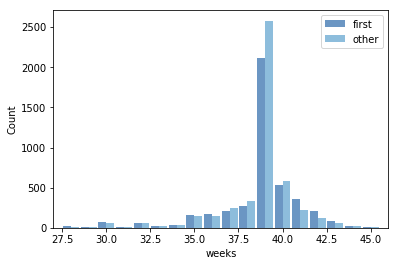

In [95]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

## Summarizing Distributions

Some of the characteristics we might want to report are:

* central tendency:
Do the values tend to cluster around a particular point?

* modes:
Is there more than one cluster?

* spread:
How much variability is there in the values?

* tails:
How quickly do the probabilities drop off as we move away from the modes?

* outliers:
Are there extreme values far from the modes?

Statistics designed to answer these questions are called **summary statistics**. By far the most common summary statistic is the mean, which is meant to describe the central tendency of the distribution.

**Variance** 

If there is no single number that summarizes pumpkin weights, we can do a little better with two numbers: mean and variance. Variance is a summary statistic intended to describe the variability or spread of a distribution.

The term  is called the “deviation from the mean,” so variance is the mean squared deviation. The square root of variance, S, is the **standard deviation**.

`Series` provides methods to compute summary statistics:

In [96]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [97]:
mean, std

(38.56055968517709, 2.702343810070587)

As an exercise, confirm that `std` is the square root of `var`:

In [98]:
var

7.302662067826817

In [101]:
from math import sqrt

print(sqrt(var))
print(std)

2.702343810070587
2.702343810070587


Here's are the mean pregnancy lengths for first babies and others:

In [102]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [103]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

**Effect Size**

An effect size is a summary statistic intended to describe (wait for it) the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.


Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.

If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.

Another way to convey the size of the effect is to compare the difference between groups to the variability within groups. Cohen’s d is a statistic intended to do that; it is defined;

d = (x1-x2)/S

where x1 and x2 are the means of the groups and s is the “pooled standard deviation”. 


This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [104]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2)/(n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [27]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [105]:
# Solution goes here

CohenEffectSize(firsts.prglngth, others.prglngth )

0.028879044654449834

In this example, the difference in means is 0.029 standard deviations, which is small. To put that in perspective, the difference in height between men and women is about 1.7 standard deviations (see Wikipedia).

**Reporting Results**

We have seen several ways to describe the difference in pregnancy length (if there is one) between first babies and others. How should we report these results?

The answer depends on who is asking the question. A scientist might be interested in any (real) effect, no matter how small. A doctor might only care about effects that are clinically significant; that is, differences that affect treatment decisions. A pregnant woman might be interested in results that are relevant to her, like the probability of delivering early or late.

How you report results also depends on your goals. If you are trying to demonstrate the importance of an effect, you might choose summary statistics that emphasize differences. If you are trying to reassure a patient, you might choose statistics that put the differences in context.

Of course your decisions should also be guided by professional ethics. It’s OK to be persuasive; you should design statistical reports and visualizations that tell a story clearly. But you should also do your best to make your reports honest, and to acknowledge uncertainty and limitations.

# Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [108]:
# Solution goes here

first_wg = firsts.totalwgt_lb.mean()
other_wg = others.totalwgt_lb.mean()

first_wg, other_wg

(7.201094430437772, 7.325855614973262)

In [109]:
# Solution goes here
CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb )

-0.08867292707260174

For the next few exercises, we'll load the respondent file:

In [115]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [116]:
# Solution goes here
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [118]:
hist = thinkstats2.Hist(resp.totincr, label = 'family_income')
hist

Hist({14: 1160, 12: 658, 11: 647, 13: 623, 9: 607, 8: 606, 7: 583, 6: 559, 10: 468, 5: 445, 4: 421, 2: 301, 1: 299, 3: 266}, 'family_income')

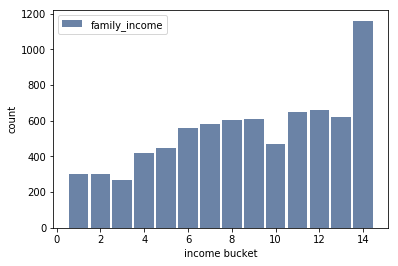

In [120]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='income bucket', ylabel='count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [121]:
# Solution goes here
hist2 = thinkstats2.Hist(resp.age_r, label = 'respondent age')
hist2

Hist({30: 292, 22: 287, 23: 282, 31: 278, 32: 273, 37: 271, 24: 269, 21: 267, 25: 267, 36: 266, 35: 262, 29: 262, 26: 260, 20: 258, 33: 257, 38: 256, 40: 256, 34: 255, 27: 255, 43: 253, 28: 252, 41: 250, 19: 241, 44: 235, 18: 235, 17: 234, 16: 223, 15: 217, 39: 215, 42: 215}, 'respondent age')

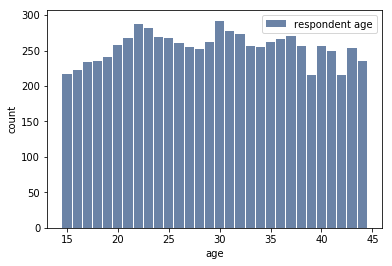

In [122]:
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='age', ylabel='count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [123]:
# Solution goes here
hist3 = thinkstats2.Hist(resp.numfmhh, label = 'number of households')
hist3

Hist({2: 1826, 3: 1740, 1: 1716, 0: 942, 4: 906, 5: 313, 6: 118, 7: 78, 8: 4}, 'number of households')

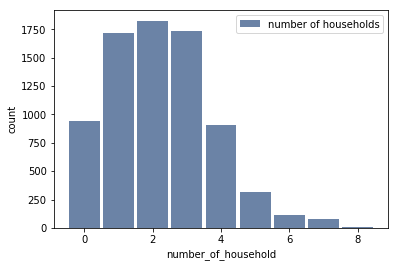

In [125]:
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='number_of_household', ylabel='count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

In [126]:
# Solution goes here
hist4 = thinkstats2.Hist(resp.parity, label = 'number of children born')
hist4

Hist({0: 3230, 2: 1603, 1: 1519, 3: 828, 4: 309, 5: 95, 6: 29, 7: 15, 8: 8, 10: 3, 9: 2, 22: 1, 16: 1}, 'number of children born')

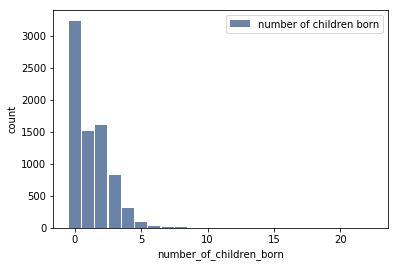

In [127]:
thinkplot.Hist(hist4)
thinkplot.Config(xlabel='number_of_children_born', ylabel='count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [128]:
# Solution goes here
hist4.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

In [130]:
# Solution goes here
high_parity = resp[resp.totinc==14]

In [132]:
hist5 = thinkstats2.Hist(high_parity.parity, label = 'number of children born')
hist5

Hist({0: 499, 2: 263, 1: 222, 3: 120, 4: 19, 5: 5, 8: 1, 7: 1}, 'number of children born')

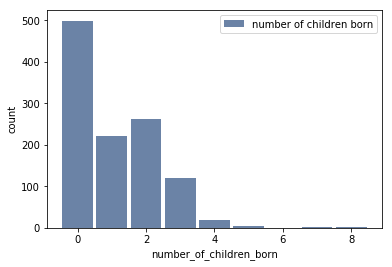

In [134]:
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='number_of_children_born', ylabel='count')

Find the largest parities for high income respondents.

In [135]:
# Solution goes here
hist5.Largest()

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 120), (2, 263), (1, 222), (0, 499)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [137]:
# Solution goes here

other_parity = resp[resp.totinc!=14]
high_parity.parity.mean(), other_parity.parity.mean()

(1.0831858407079646, 1.2475049900199602)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [139]:
# Solution goes here

CohenEffectSize(high_parity.parity, other_parity.parity )

-0.11833718789483756